<a href="https://colab.research.google.com/github/dstulman714/conjgrad/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


class Perceptron:
    def __init__(self):
          self.weights = np.random.standard_normal((3,))
          self.learning_rate = 0.1

    def predict(self, inputs):
        net_input = np.dot(self.weights, inputs)
        return self.classify(net_input)
        

    def classify(self, sum):
            if sum > 0:
                return 1
            else:
                return 0

    def norm(self, vec1, vec2):
      return np.sqrt(sum((vec1 - vec2) ** 2))           

    def train(self, training_set):
      loops  = 870
      for i in range(loops): 
        print('loop: ' + str(i + 1))
        for example in training_set:
          example = np.array(example)
          guess = self.predict(example[:3])
          error = example[3] - guess
          if error != 0:
            print(error)  
          self.weights += error * example[:3] * self.learning_rate
      print('weights: ', self.weights)
      print('slope: ', -(self.weights[0] / self.weights[1]))
      print('intercept: ', -(self.weights[2] / self.weights[1]))
        

In [41]:
p = Perceptron()

training_set = []


iris=datasets.load_iris()
X = iris.data[0:99,:2]

y = iris.target[0:99] 
y = np.array([1 if y[i] == 1 else 0 for i in range(len(y))]) # (100, )

for i in range(np.shape(X)[0]):
    training_set.append([X[i][0], X[i][1], 1, y[i]])
p.train(training_set)

training_set = np.array(training_set)
zeros = []
ones = []
for i in range(len(training_set)):
    if training_set[i, 3] == 0:
        zeros.append([training_set[i,0], training_set[i,1]])
    else:
        ones.append([training_set[i,0], training_set[i,1]])
zeros = np.array(zeros)
ones = np.array(ones)

loop: 1
1.0
1.0
1.0
loop: 2
-1.0
1.0
loop: 3
-1.0
-1.0
1.0
loop: 4
-1.0
1.0
loop: 5
-1.0
1.0
loop: 6
-1.0
1.0
loop: 7
-1.0
-1.0
1.0
loop: 8
-1.0
1.0
loop: 9
-1.0
1.0
loop: 10
-1.0
1.0
loop: 11
-1.0
1.0
loop: 12
-1.0
-1.0
1.0
loop: 13
-1.0
1.0
loop: 14
-1.0
1.0
loop: 15
-1.0
1.0
loop: 16
-1.0
1.0
loop: 17
-1.0
-1.0
1.0
loop: 18
-1.0
1.0
loop: 19
-1.0
1.0
loop: 20
-1.0
1.0
loop: 21
-1.0
1.0
loop: 22
-1.0
-1.0
1.0
loop: 23
-1.0
1.0
loop: 24
-1.0
1.0
loop: 25
-1.0
1.0
loop: 26
-1.0
1.0
loop: 27
-1.0
-1.0
1.0
loop: 28
-1.0
1.0
loop: 29
-1.0
1.0
loop: 30
-1.0
1.0
loop: 31
-1.0
1.0
loop: 32
-1.0
-1.0
1.0
loop: 33
-1.0
1.0
loop: 34
-1.0
1.0
loop: 35
-1.0
1.0
loop: 36
-1.0
-1.0
1.0
loop: 37
-1.0
1.0
loop: 38
-1.0
1.0
loop: 39
-1.0
1.0
loop: 40
-1.0
-1.0
1.0
loop: 41
-1.0
1.0
loop: 42
-1.0
1.0
loop: 43
-1.0
-1.0
1.0
loop: 44
-1.0
1.0
loop: 45
-1.0
1.0
loop: 46
-1.0
-1.0
1.0
loop: 47
-1.0
1.0
loop: 48
-1.0
1.0
loop: 49
-1.0
-1.0
1.0
loop: 50
-1.0
1.0
loop: 51
-1.0
1.0
loop: 52
-1.0
-1.0
1.0
loop:

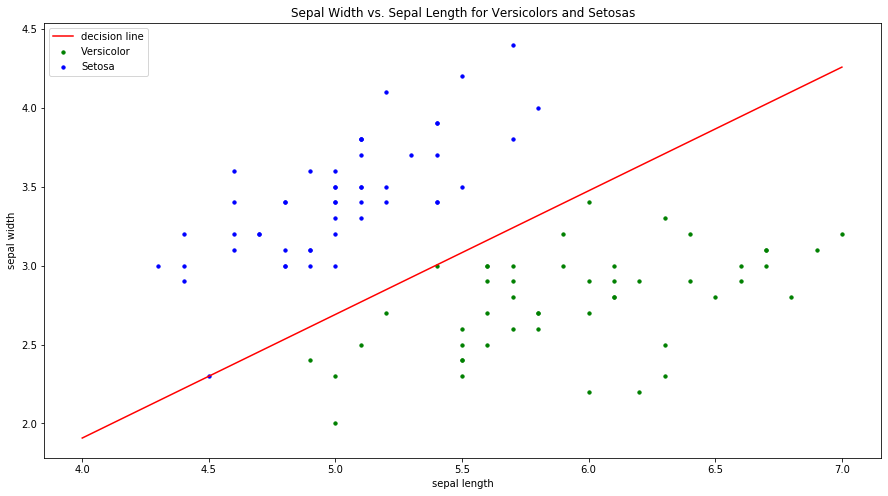

In [42]:
plt.scatter(ones[:, 0], ones[:, 1], color = 'green', label = 'Versicolor', s= 10.9)
plt.scatter(zeros[:, 0], zeros[:, 1], color = 'blue', label = 'Setosa', s = 10.9)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal Width vs. Sepal Length for Versicolors and Setosas')
xx = np.linspace(4,7,100)
plt.plot(xx, -(p.weights[0] / p.weights[1]) * xx   \
      -(p.weights[2] / p.weights[1]), color = 'red', label = 'decision line')
plt.gcf().set_size_inches(15, 8)
plt.legend()